In [1]:
import pandas as pd
import numpy as np
import pickle
import tabulate
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset.csv')

with open('my_list.pkl', 'rb') as f:
    len_list = pickle.load(f)

In [3]:
dataset.loc[dataset["punc"] == "!", "punc"] = ","

In [4]:
dataset.describe()

,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.00000,1455.00000,1455.000000,1455.000000,1455.000000,1455.000000
mean,21.048024,-0.135052,0.029201,0.057472,0.21266,0.21266,-0.000687,-0.000687,-0.414479,-0.414479
std,14.610886,0.580940,2.560021,0.138843,0.21542,0.21542,0.626391,0.626391,5.003858,5.003858
min,0.136000,-1.000000,-64.880000,-0.404000,0.04000,0.04000,-2.000000,-2.000000,-22.222222,-22.222222
25%,9.215000,-0.500000,0.065750,0.005000,0.10500,0.10500,0.000000,0.000000,0.000000,0.000000
50%,19.170000,0.000000,0.107000,0.011200,0.14000,0.14000,0.000000,0.000000,0.000000,0.000000
75%,29.775500,0.000000,0.157350,0.048000,0.20000,0.20000,0.000000,0.000000,0.000000,0.000000
max,65.880000,1.000000,1.539000,1.478000,1.68000,1.68000,2.000000,2.000000,20.000000,20.000000


In [5]:
print("Features for \",\"")
dataset[dataset["punc"] == ","].describe()[:"mean"]

Features for ","


,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,16.000000,16.00000,16.000000,16.00000,16.000000,16.000000,16.00000,16.0000,16.0000,16.000000
mean,9.302812,-0.03125,0.194981,0.11905,0.200313,0.725312,0.34375,-0.0625,2.1731,-0.096643


In [6]:
print("Features for \".\"")
dataset[dataset["punc"] == "."].describe()[0:]

Features for "."


,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000
mean,26.582535,-0.220930,-4.726681,0.225481,0.329535,0.859070,0.267442,0.72093,0.925882,0.697519
std,14.435720,0.610448,14.188640,0.451711,0.347725,0.394062,0.580936,0.66639,3.309010,0.625711
min,6.961000,-1.000000,-64.880000,0.001000,0.080000,0.075000,-1.000000,-1.00000,-6.250000,-0.917431
25%,15.064000,-1.000000,0.052000,0.006500,0.120000,0.835000,0.000000,0.00000,0.000000,0.000000
50%,25.051000,0.000000,0.095000,0.015000,0.160000,0.990000,0.000000,1.00000,0.000000,0.865801
75%,34.812500,0.000000,0.151000,0.038000,0.250000,1.087500,1.000000,1.00000,1.000000,1.066674
max,65.880000,1.000000,0.882000,1.478000,1.000000,1.680000,1.000000,2.00000,9.523810,1.904762


In [7]:
print("Features for no punctuation")
dataset[dataset["punc"] == " "].describe()[0:]

Features for no punctuation


,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,21.012164,-0.133596,0.173793,0.051591,0.209201,0.186873,-0.012894,-0.022206,-0.485422,-0.452373
std,14.590568,0.583116,0.224858,0.110431,0.209594,0.163969,0.624051,0.613651,5.022898,5.102873
min,0.136000,-1.000000,0.000100,-0.404000,0.040000,0.040000,-2.000000,-2.000000,-22.222222,-22.222222
25%,9.178250,-0.500000,0.066000,0.005000,0.105000,0.105000,-0.500000,-0.500000,-0.616373,-0.659427
50%,19.172500,0.000000,0.108000,0.011050,0.140000,0.140000,0.000000,0.000000,0.000000,0.000000
75%,29.726000,0.000000,0.157600,0.048250,0.200000,0.190000,0.000000,0.000000,0.000000,0.000000
max,65.760000,1.000000,1.539000,1.084000,1.680000,1.000000,2.000000,2.000000,20.000000,20.000000


In [8]:
subset_dot = dataset[dataset["punc"] == "."]
x1 = subset_dot.describe().loc[["mean"]].reset_index(drop=True)

subset_comma = dataset[dataset["punc"] == ","]
x2 = subset_comma.describe().loc[["mean"]].reset_index(drop=True)

subset_space = dataset[dataset["punc"] == " "]
x3 = subset_space.describe().loc[["mean"]].reset_index(drop=True)

result_df = pd.concat([x1, x2, x3], keys=['.', ',', ' '])
result_df

,,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
.,0,26.582535,-0.220930,-4.726681,0.225481,0.329535,0.859070,0.267442,0.720930,0.925882,0.697519
",",0,9.302812,-0.031250,0.194981,0.119050,0.200313,0.725312,0.343750,-0.062500,2.173100,-0.096643
,0,21.012164,-0.133596,0.173793,0.051591,0.209201,0.186873,-0.012894,-0.022206,-0.485422,-0.452373


In [9]:
df = result_df.drop(columns=["Time Stamps (s)", "Values"])
result_df = df.T

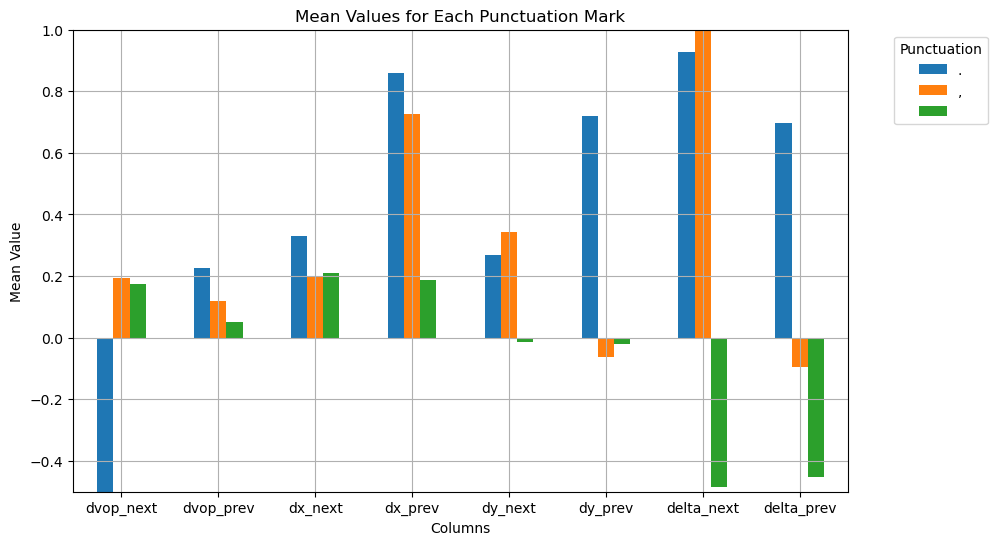

In [10]:
result_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Mean Values for Each Punctuation Mark')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.legend(title='Punctuation', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['.', ',', ' '])
plt.ylim([-0.5,1])
plt.grid()
plt.show()